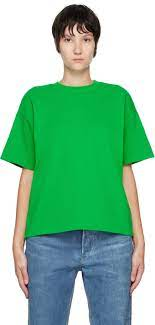

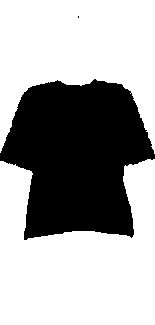

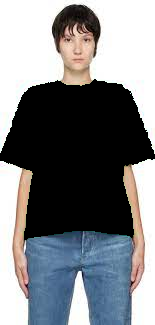

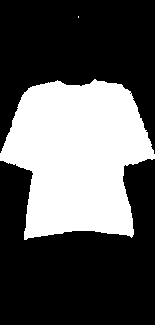

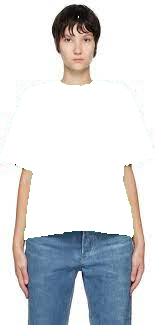

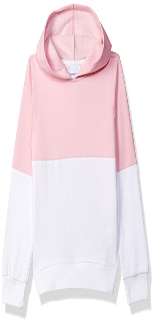

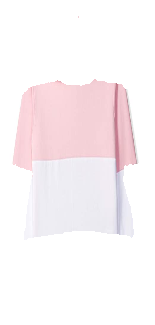

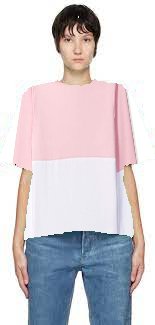

-1

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

frame = cv2.imread('sample_single_6_women_tshirt.jpeg') #read the image
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) #convert to bgr colours to hsv

lower_green = np.array([36, 25, 25])
upper_green = np.array([86, 255, 255])

# Masks to get only green colors
mask_white = cv2.inRange(hsv,lower_green, upper_green) #mask of green
mask_black = cv2.bitwise_not(mask_white)

#converting mask_black to 3 channels
W,L = mask_black.shape
mask_black_3CH = np.empty((W, L, 3), dtype=np.uint8)
mask_black_3CH[:, :, 0] = mask_black
mask_black_3CH[:, :, 1] = mask_black
mask_black_3CH[:, :, 2] = mask_black

cv2_imshow(frame)
cv2_imshow(mask_black_3CH)

dst3 = cv2.bitwise_and(mask_black_3CH,frame) #combine black-mask with original
cv2_imshow(dst3)

#converting mask_white to 3 channels
W,L = mask_white.shape
mask_white_3CH = np.empty((W, L, 3), dtype=np.uint8)
mask_white_3CH[:, :, 0] = mask_white
mask_white_3CH[:, :, 1] = mask_white
mask_white_3CH[:, :, 2] = mask_white

cv2_imshow(mask_white_3CH)
dst3_wh = cv2.bitwise_or(mask_white_3CH,dst3) #combine white_mask with dst3(black_mask+original)
cv2_imshow(dst3_wh)


#///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


# changing for design
design = cv2.imread('d_5.jpeg')
design = cv2.resize(design, mask_white.shape[1::-1])
                                            #give output as (column,row)
cv2_imshow(design)

design_mask_mixed = cv2.bitwise_or(mask_black_3CH,design)
cv2_imshow(design_mask_mixed)

final_mask_black_3CH = cv2.bitwise_and(design_mask_mixed,dst3_wh)
cv2_imshow(final_mask_black_3CH)

cv2.waitKey()